In [32]:
# for colab
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)
# import os
# os.chdir('/content/drive/MyDrive/Monthly_Workout')
#!pip install pycaret

# Enable pycaret for colab
# from pycaret.utils import enable_colab
# enable_colab()

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
X_train = pd.read_csv('./data/train_features.csv')
y_train = pd.read_csv('./data/train_labels.csv')
X_test = pd.read_csv('./data/test_features.csv')
display(X_train)
display(y_train)
display(X_test)

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,3125,0,-0.628100,-0.160155,0.151487,49.665357,88.435961,13.597668
1,3125,1,-0.462548,0.012462,-0.053726,56.953059,96.185341,16.278458
2,3125,2,-0.363481,-0.091789,-0.130004,29.557396,93.836453,13.329043
3,3125,3,-0.351750,-0.239870,-0.193053,23.686172,88.608721,13.449771
4,3125,4,-0.312934,-0.123762,-0.318621,20.410071,85.327707,13.884912
...,...,...,...,...,...,...,...,...
469195,3906,595,0.104191,-0.784979,0.639513,-10.475346,14.095361,-190.358982
469196,3906,596,0.103297,-0.758954,0.615687,-25.360272,-8.523018,-180.393291
469197,3906,597,0.128294,-0.749389,0.586184,-27.917723,-23.186245,-162.624160
469198,3906,598,0.104130,-0.692731,0.573397,-27.847980,-30.407555,-138.761676


In [3]:
# X_train 의 데이터를 통해서 id와 time을 제외한 feature를 대상으로 id를 기준으로 잡아
# 합, 평균, 중앙값, 최소값, 최대값, 보정 표본 표준편차, 비편향 편차의 값을 구합니다.

X_pivot_train = pd.pivot_table(data=X_train, values=X_train.columns[2:], 
                               index='id', 
                               aggfunc = ['sum','mean', 'median','min','max', 'std','var']
                               )

X_pivot_test = pd.pivot_table(data = X_test, values = X_test.columns[2:], 
                              index = 'id', 
                              aggfunc = ['sum','mean', 'median','min','max', 'std','var']
                              )

display(X_pivot_train)
display(X_pivot_test)

sum                                                     \
           acc_x       acc_y       acc_z          gy_x         gy_y   
id                                                                    
0     558.797337 -131.082711 -222.252919  -1119.161589 -2015.703683   
1    -459.948117 -190.354639   -2.534051   6642.960123  1044.284884   
2      23.901616  -49.441742  375.607013  -5083.770868   358.725917   
3    -532.621192  -52.600737  136.413976  10646.500409  2880.558352   
4    -395.410844 -202.240064  121.654507  -2891.782899  5791.027696   
...          ...         ...         ...           ...          ...   
3120 -180.272174 -401.525652  201.560530  -3229.789337 -2941.679051   
3121 -584.578686 -140.023548  -44.262826   6836.985564  2272.105392   
3122 -668.547732 -217.317785  144.910824  -2292.798232  6103.301689   
3123  -66.799727  528.216970  -73.654160  -3734.255616 -6965.012570   
3124 -260.428968 -373.805701  136.108687   -983.222826  -736.121776   

                       mean                                 ...       std  \
             gy_z     acc_x     acc_y     acc_z       gy_x  ...     acc_z   
id                                                          ...             
0      709.264425  0.931329 -0.218471 -0.370422  -1.865269  ...  0.135131   
1      835.976169 -0.766580 -0.317258 -0.004223  11.071600  ...  0.499395   
2     1831.974458  0.039836 -0.082403  0.626012  -8.472951  ...  0.248807   
3    -3521.938833 -0.887702 -0.087668  0.227357  17.744167  ...  0.205882   
4     2672.029417 -0.659018 -0.337067  0.202758  -4.819638  ...  0.389646   
...           ...       ...       ...       ...        ...  ...       ...   
3120   -32.415360 -0.300454 -0.669209  0.335934  -5.382982  ...  0.343256   
3121 -1675.342583 -0.974298 -0.233373 -0.073771  11.394976  ...  0.086122   
3122 -1033.698245 -1.114246 -0.362196  0.241518  -3.821330  ...  0.211179   
3123 -3558.151108 -0.111333  0.880362 -0.122757  -6.223759  ...  0.263090   
3124 -1948.094865 -0.434048 -0.623010  0.226848  -1.638705  ...  0.242974   

                                               var                      \
            gy_x        gy_y        gy_z     acc_x     acc_y     acc_z   
id                                                                       
0      13.284216   24.300479   25.275185  0.036664  0.031375  0.018260   
1      79.244561   96.005289   75.545343  0.245548  0.113175  0.249396   
2      25.422926  118.956646   13.920337  0.506904  0.021646  0.061905   
3      42.928860   36.953466   23.647153  0.017134  0.037639  0.042387   
4     108.258866   60.514531   46.148326  0.245193  0.325247  0.151824   
...          ...         ...         ...       ...       ...       ...   
3120   36.396460   38.175673   24.913819  0.162550  0.035006  0.117825   
3121   35.398629   15.430092   12.786464  0.028887  0.013767  0.007417   
3122  148.498677  240.043788  131.916609  0.467567  0.112211  0.044597   
3123   50.821032   79.990803   71.243150  0.187248  0.046994  0.069216   
3124   18.433072   69.841238   49.371117  0.272596  0.043506  0.059036   

                                                
              gy_x          gy_y          gy_z  
id                                              
0       176.470384    590.513292    638.834979  
1      6279.700472   9217.015511   5707.098884  
2       646.325142  14150.683677    193.775778  
3      1842.887012   1365.558625    559.187841  
4     11719.982095   3662.008463   2129.668017  
...            ...           ...           ...  
3120   1324.702298   1457.382016    620.698354  
3121   1253.062926    238.087738    163.493653  
3122  22051.857079  57621.020319  17401.991847  
3123   2582.777254   6398.528531   5075.586383  
3124    339.778155   4877.798463   2437.507157  

[3125 rows x 42 columns]

sum                                                     \
           acc_x       acc_y       acc_z          gy_x         gy_y   
id                                                                    
3125 -611.238360  -11.744605 -139.355669  -1911.076959  1639.123438   
3126 -313.705824  367.296809  -42.655405 -10644.915365  4184.863263   
3127  304.167948  542.291164  -84.658968  -1307.846921 -1350.871152   
3128 -346.561617 -366.333946   18.891749    485.147442 -1790.981310   
3129 -443.184021  109.521180  240.781103   -858.922755   865.419381   
...          ...         ...         ...           ...          ...   
3902 -544.379649  292.958363 -142.895722   3130.975753   731.246016   
3903 -365.238633  222.761433  -64.107069   3810.088754  2392.247064   
3904 -451.915502  119.869170  187.061223   -456.632088 -1395.398530   
3905  575.341801 -192.585160 -213.740440   1535.405200  -991.937287   
3906 -469.051442 -221.546652   84.737735  -6888.499584 -2198.564992   

                       mean                                 ...       std  \
             gy_z     acc_x     acc_y     acc_z       gy_x  ...     acc_z   
id                                                          ...             
3125 -1200.410049 -1.018731 -0.019574 -0.232259  -3.185128  ...  0.174672   
3126 -2162.747150 -0.522843  0.612161 -0.071092 -17.741526  ...  0.383800   
3127  -235.904841  0.506947  0.903819 -0.141098  -2.179745  ...  0.152077   
3128   -14.590798 -0.577603 -0.610557  0.031486   0.808579  ...  0.326569   
3129  3447.298941 -0.738640  0.182535  0.401302  -1.431538  ...  0.261848   
...           ...       ...       ...       ...        ...  ...       ...   
3902  -257.807046 -0.907299  0.488264 -0.238160   5.218293  ...  0.211406   
3903  7963.284639 -0.608731  0.371269 -0.106845   6.350148  ...  0.239054   
3904  1161.049596 -0.753193  0.199782  0.311769  -0.761053  ...  0.256525   
3905   559.387949  0.958903 -0.320975 -0.356234   2.559009  ...  0.167503   
3906 -4318.669726 -0.781752 -0.369244  0.141230 -11.480833  ...  0.326125   

                                             var                      \
            gy_x       gy_y       gy_z     acc_x     acc_y     acc_z   
id                                                                     
3125   12.897967  31.993022  12.251648  0.055806  0.008398  0.030510   
3126   51.625096  45.706311  61.604867  0.291264  0.110899  0.147302   
3127   22.770845  13.467885  23.041463  0.048371  0.036666  0.023128   
3128   42.818157  45.069932  37.967372  0.186376  0.054569  0.106647   
3129   92.301963  67.911174  43.353007  0.093512  0.098781  0.068565   
...          ...        ...        ...       ...       ...       ...   
3902  144.440736  71.579502  68.462972  0.124330  0.137249  0.044692   
3903   87.466132  57.156752  81.398849  0.440262  0.165247  0.057147   
3904   45.365802  35.970379  48.113344  0.063840  0.090332  0.065805   
3905   29.626394  43.583611  26.523530  0.027185  0.014570  0.028057   
3906   64.330216  49.074290  36.491662  0.104824  0.048088  0.106358   

                                              
              gy_x         gy_y         gy_z  
id                                            
3125    166.357553  1023.553453   150.102867  
3126   2665.150566  2089.066820  3795.159662  
3127    518.511372   181.383940   530.909012  
3128   1833.394532  2031.298793  1441.521366  
3129   8519.652350  4611.927587  1879.483194  
...            ...          ...          ...  
3902  20863.126353  5123.625095  4687.178521  
3903   7650.324175  3266.894255  6625.772629  
3904   2058.055967  1293.868192  2314.893857  
3905    877.723193  1899.531156   703.497641  
3906   4138.376636  2408.285958  1331.641362  

[782 rows x 42 columns]

In [4]:
X_pivot_train.columns[:5]
X_columns = [agg + '_' + column for agg,column in X_pivot_train.columns]
X_pivot_train.columns = X_columns
X_pivot_test.columns = X_columns
display(X_pivot_train)

,sum_acc_x,sum_acc_y,sum_acc_z,sum_gy_x,sum_gy_y,sum_gy_z,mean_acc_x,mean_acc_y,mean_acc_z,mean_gy_x,...,std_acc_z,std_gy_x,std_gy_y,std_gy_z,var_acc_x,var_acc_y,var_acc_z,var_gy_x,var_gy_y,var_gy_z
id,,,,,,,,,,,,,,,,,,,,,
0,558.797337,-131.082711,-222.252919,-1119.161589,-2015.703683,709.264425,0.931329,-0.218471,-0.370422,-1.865269,...,0.135131,13.284216,24.300479,25.275185,0.036664,0.031375,0.018260,176.470384,590.513292,638.834979
1,-459.948117,-190.354639,-2.534051,6642.960123,1044.284884,835.976169,-0.766580,-0.317258,-0.004223,11.071600,...,0.499395,79.244561,96.005289,75.545343,0.245548,0.113175,0.249396,6279.700472,9217.015511,5707.098884
2,23.901616,-49.441742,375.607013,-5083.770868,358.725917,1831.974458,0.039836,-0.082403,0.626012,-8.472951,...,0.248807,25.422926,118.956646,13.920337,0.506904,0.021646,0.061905,646.325142,14150.683677,193.775778
3,-532.621192,-52.600737,136.413976,10646.500409,2880.558352,-3521.938833,-0.887702,-0.087668,0.227357,17.744167,...,0.205882,42.928860,36.953466,23.647153,0.017134,0.037639,0.042387,1842.887012,1365.558625,559.187841
4,-395.410844,-202.240064,121.654507,-2891.782899,5791.027696,2672.029417,-0.659018,-0.337067,0.202758,-4.819638,...,0.389646,108.258866,60.514531,46.148326,0.245193,0.325247,0.151824,11719.982095,3662.008463,2129.668017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,-180.272174,-401.525652,201.560530,-3229.789337,-2941.679051,-32.415360,-0.300454,-0.669209,0.335934,-5.382982,...,0.343256,36.396460,38.175673,24.913819,0.162550,0.035006,0.117825,1324.702298,1457.382016,620.698354
3121,-584.578686,-140.023548,-44.262826,6836.985564,2272.105392,-1675.342583,-0.974298,-0.233373,-0.073771,11.394976,...,0.086122,35.398629,15.430092,12.786464,0.028887,0.013767,0.007417,1253.062926,238.087738,163.493653
3122,-668.547732,-217.317785,144.910824,-2292.798232,6103.301689,-1033.698245,-1.114246,-0.362196,0.241518,-3.821330,...,0.211179,148.498677,240.043788,131.916609,0.467567,0.112211,0.044597,22051.857079,57621.020319,17401.991847


In [5]:
X_pivot_train = X_pivot_train.reset_index()
X_pivot_test = X_pivot_test.reset_index()

display(X_pivot_train)
display(X_pivot_test)

,id,sum_acc_x,sum_acc_y,sum_acc_z,sum_gy_x,sum_gy_y,sum_gy_z,mean_acc_x,mean_acc_y,mean_acc_z,...,std_acc_z,std_gy_x,std_gy_y,std_gy_z,var_acc_x,var_acc_y,var_acc_z,var_gy_x,var_gy_y,var_gy_z
0,0,558.797337,-131.082711,-222.252919,-1119.161589,-2015.703683,709.264425,0.931329,-0.218471,-0.370422,...,0.135131,13.284216,24.300479,25.275185,0.036664,0.031375,0.018260,176.470384,590.513292,638.834979
1,1,-459.948117,-190.354639,-2.534051,6642.960123,1044.284884,835.976169,-0.766580,-0.317258,-0.004223,...,0.499395,79.244561,96.005289,75.545343,0.245548,0.113175,0.249396,6279.700472,9217.015511,5707.098884
2,2,23.901616,-49.441742,375.607013,-5083.770868,358.725917,1831.974458,0.039836,-0.082403,0.626012,...,0.248807,25.422926,118.956646,13.920337,0.506904,0.021646,0.061905,646.325142,14150.683677,193.775778
3,3,-532.621192,-52.600737,136.413976,10646.500409,2880.558352,-3521.938833,-0.887702,-0.087668,0.227357,...,0.205882,42.928860,36.953466,23.647153,0.017134,0.037639,0.042387,1842.887012,1365.558625,559.187841
4,4,-395.410844,-202.240064,121.654507,-2891.782899,5791.027696,2672.029417,-0.659018,-0.337067,0.202758,...,0.389646,108.258866,60.514531,46.148326,0.245193,0.325247,0.151824,11719.982095,3662.008463,2129.668017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3120,-180.272174,-401.525652,201.560530,-3229.789337,-2941.679051,-32.415360,-0.300454,-0.669209,0.335934,...,0.343256,36.396460,38.175673,24.913819,0.162550,0.035006,0.117825,1324.702298,1457.382016,620.698354
3121,3121,-584.578686,-140.023548,-44.262826,6836.985564,2272.105392,-1675.342583,-0.974298,-0.233373,-0.073771,...,0.086122,35.398629,15.430092,12.786464,0.028887,0.013767,0.007417,1253.062926,238.087738,163.493653
3122,3122,-668.547732,-217.317785,144.910824,-2292.798232,6103.301689,-1033.698245,-1.114246,-0.362196,0.241518,...,0.211179,148.498677,240.043788,131.916609,0.467567,0.112211,0.044597,22051.857079,57621.020319,17401.991847
3123,3123,-66.799727,528.216970,-73.654160,-3734.255616,-6965.012570,-3558.151108,-0.111333,0.880362,-0.122757,...,0.263090,50.821032,79.990803,71.243150,0.187248,0.046994,0.069216,2582.777254,6398.528531,5075.586383


,id,sum_acc_x,sum_acc_y,sum_acc_z,sum_gy_x,sum_gy_y,sum_gy_z,mean_acc_x,mean_acc_y,mean_acc_z,...,std_acc_z,std_gy_x,std_gy_y,std_gy_z,var_acc_x,var_acc_y,var_acc_z,var_gy_x,var_gy_y,var_gy_z
0,3125,-611.238360,-11.744605,-139.355669,-1911.076959,1639.123438,-1200.410049,-1.018731,-0.019574,-0.232259,...,0.174672,12.897967,31.993022,12.251648,0.055806,0.008398,0.030510,166.357553,1023.553453,150.102867
1,3126,-313.705824,367.296809,-42.655405,-10644.915365,4184.863263,-2162.747150,-0.522843,0.612161,-0.071092,...,0.383800,51.625096,45.706311,61.604867,0.291264,0.110899,0.147302,2665.150566,2089.066820,3795.159662
2,3127,304.167948,542.291164,-84.658968,-1307.846921,-1350.871152,-235.904841,0.506947,0.903819,-0.141098,...,0.152077,22.770845,13.467885,23.041463,0.048371,0.036666,0.023128,518.511372,181.383940,530.909012
3,3128,-346.561617,-366.333946,18.891749,485.147442,-1790.981310,-14.590798,-0.577603,-0.610557,0.031486,...,0.326569,42.818157,45.069932,37.967372,0.186376,0.054569,0.106647,1833.394532,2031.298793,1441.521366
4,3129,-443.184021,109.521180,240.781103,-858.922755,865.419381,3447.298941,-0.738640,0.182535,0.401302,...,0.261848,92.301963,67.911174,43.353007,0.093512,0.098781,0.068565,8519.652350,4611.927587,1879.483194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,-544.379649,292.958363,-142.895722,3130.975753,731.246016,-257.807046,-0.907299,0.488264,-0.238160,...,0.211406,144.440736,71.579502,68.462972,0.124330,0.137249,0.044692,20863.126353,5123.625095,4687.178521
778,3903,-365.238633,222.761433,-64.107069,3810.088754,2392.247064,7963.284639,-0.608731,0.371269,-0.106845,...,0.239054,87.466132,57.156752,81.398849,0.440262,0.165247,0.057147,7650.324175,3266.894255,6625.772629
779,3904,-451.915502,119.869170,187.061223,-456.632088,-1395.398530,1161.049596,-0.753193,0.199782,0.311769,...,0.256525,45.365802,35.970379,48.113344,0.063840,0.090332,0.065805,2058.055967,1293.868192,2314.893857
780,3905,575.341801,-192.585160,-213.740440,1535.405200,-991.937287,559.387949,0.958903,-0.320975,-0.356234,...,0.167503,29.626394,43.583611,26.523530,0.027185,0.014570,0.028057,877.723193,1899.531156,703.497641


In [6]:
y_train

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [7]:
# mapper = {26: 0} 
# y_train['label'].replace(mapper, inplace=True)
# y_train['label'] = [0 if x in [0] else 1 for x in y_train['label']]
# display(y_train)

In [8]:
train_data = pd.merge(X_pivot_train, y_train.loc[:,['id','label']], on='id') # label_desc 제외
train_data.label = train_data.label.astype('category')
display(train_data)

,id,sum_acc_x,sum_acc_y,sum_acc_z,sum_gy_x,sum_gy_y,sum_gy_z,mean_acc_x,mean_acc_y,mean_acc_z,...,std_gy_x,std_gy_y,std_gy_z,var_acc_x,var_acc_y,var_acc_z,var_gy_x,var_gy_y,var_gy_z,label
0,0,558.797337,-131.082711,-222.252919,-1119.161589,-2015.703683,709.264425,0.931329,-0.218471,-0.370422,...,13.284216,24.300479,25.275185,0.036664,0.031375,0.018260,176.470384,590.513292,638.834979,37
1,1,-459.948117,-190.354639,-2.534051,6642.960123,1044.284884,835.976169,-0.766580,-0.317258,-0.004223,...,79.244561,96.005289,75.545343,0.245548,0.113175,0.249396,6279.700472,9217.015511,5707.098884,26
2,2,23.901616,-49.441742,375.607013,-5083.770868,358.725917,1831.974458,0.039836,-0.082403,0.626012,...,25.422926,118.956646,13.920337,0.506904,0.021646,0.061905,646.325142,14150.683677,193.775778,3
3,3,-532.621192,-52.600737,136.413976,10646.500409,2880.558352,-3521.938833,-0.887702,-0.087668,0.227357,...,42.928860,36.953466,23.647153,0.017134,0.037639,0.042387,1842.887012,1365.558625,559.187841,26
4,4,-395.410844,-202.240064,121.654507,-2891.782899,5791.027696,2672.029417,-0.659018,-0.337067,0.202758,...,108.258866,60.514531,46.148326,0.245193,0.325247,0.151824,11719.982095,3662.008463,2129.668017,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,3120,-180.272174,-401.525652,201.560530,-3229.789337,-2941.679051,-32.415360,-0.300454,-0.669209,0.335934,...,36.396460,38.175673,24.913819,0.162550,0.035006,0.117825,1324.702298,1457.382016,620.698354,26
3121,3121,-584.578686,-140.023548,-44.262826,6836.985564,2272.105392,-1675.342583,-0.974298,-0.233373,-0.073771,...,35.398629,15.430092,12.786464,0.028887,0.013767,0.007417,1253.062926,238.087738,163.493653,26
3122,3122,-668.547732,-217.317785,144.910824,-2292.798232,6103.301689,-1033.698245,-1.114246,-0.362196,0.241518,...,148.498677,240.043788,131.916609,0.467567,0.112211,0.044597,22051.857079,57621.020319,17401.991847,15
3123,3123,-66.799727,528.216970,-73.654160,-3734.255616,-6965.012570,-3558.151108,-0.111333,0.880362,-0.122757,...,50.821032,79.990803,71.243150,0.187248,0.046994,0.069216,2582.777254,6398.528531,5075.586383,26


In [10]:
### Find Best Model with Pycaret
from pycaret.regression import *

clf = setup(data = train_data, target = 'label')

,Description,Value
0,session_id,7918
1,Target,label
2,Original Data,"(3125, 44)"
3,Missing Values,False
4,Numeric Features,43
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2187, 36)"


In [11]:
compare_models(sort = 'MAE') 

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,6.5256,110.9766,10.4880,0.3507,0.5326,0.6216,0.1810
rf,Random Forest Regressor,6.7350,114.5566,10.6652,0.3291,0.5368,0.6299,1.0760
gbr,Gradient Boosting Regressor,7.3893,130.1880,11.3796,0.2376,0.5655,0.7124,0.2850
dt,Decision Tree Regressor,8.2070,228.7447,15.1070,-0.3495,0.7137,0.6230,0.0270
omp,Orthogonal Matching Pursuit,8.7072,167.3915,12.9256,0.0174,0.6244,0.8233,0.0060
br,Bayesian Ridge,8.8538,169.2128,12.9955,0.0074,0.6277,0.8330,0.0090
lasso,Lasso Regression,8.8638,168.5610,12.9705,0.0107,0.6273,0.8394,0.1270
ridge,Ridge Regression,8.8678,159.1675,12.6011,0.0656,0.6175,0.8220,0.0110
en,Elastic Net,8.8765,168.3536,12.9623,0.0119,0.6270,0.8390,0.0070
lr,Linear Regression,8.9454,159.7943,12.6256,0.0619,0.6182,0.8241,0.2770


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=7918, verbose=0, warm_start=False)

In [12]:
# 모델 생성하기

et = create_model('et', cross_validation = False) # Extra Trees Regressor
rf = create_model('rf', cross_validation = False) # Random Forest Regressor

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,6.2559,105.1907,10.2563,0.3135,0.549,0.5588


In [13]:
# 하이퍼파라미터 튜닝

tuned_et = tune_model(et, optimize = 'RMSE', n_iter = 10)
tuned_rf = tune_model(rf, optimize = 'RMSE', n_iter = 10)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,7.9109,135.2820,11.6311,0.2181,0.5205,0.6340
1,8.0879,142.4774,11.9364,0.2045,0.6009,0.7246
2,7.5216,124.3282,11.1503,0.1746,0.5611,0.6437
3,7.8193,138.1377,11.7532,0.2146,0.5439,0.6929
4,7.7171,135.1188,11.6241,0.1601,0.6762,1.0775
5,9.1949,174.7268,13.2184,0.0775,0.6403,0.8880
6,7.5725,130.3725,11.4181,0.0753,0.6555,0.9591
7,7.2894,126.5506,11.2495,0.2497,0.5269,0.5832
8,7.8990,139.3145,11.8032,0.1829,0.5498,0.6374
9,8.8240,170.8347,13.0704,0.1326,0.6452,0.8265


IntProgress(value=0, description='Processing: ', max=7)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,00:13:40
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,MAE,MSE,RMSE,R2,RMSLE,MAPE


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   14.9s


KeyboardInterrupt: 

In [45]:
# 모델 블렌딩
# blender_specific = blend_models(estimator_list = [tuned_dt,tuned_et], optimize = 'RMSE')

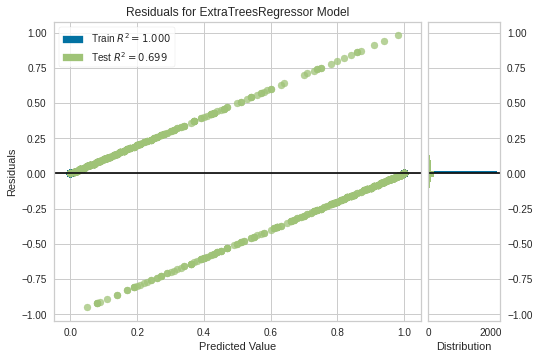

In [46]:
plot_model(et)

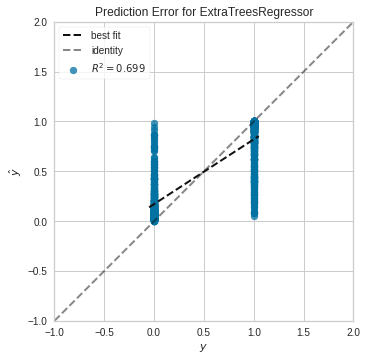

In [47]:
plot_model(et, plot='error')

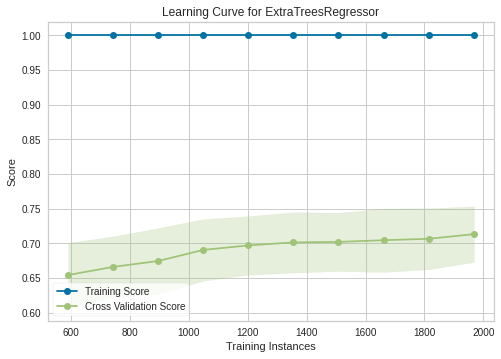

In [48]:
plot_model(et, plot='learning')

In [49]:
final_model = finalize_model(et)

In [50]:
pred = predict_model(final_model, data = X_pivot_test)

In [51]:
pred

,id,sum_acc_x,sum_acc_y,sum_acc_z,sum_gy_x,sum_gy_y,sum_gy_z,mean_acc_x,mean_acc_y,mean_acc_z,...,std_gy_x,std_gy_y,std_gy_z,var_acc_x,var_acc_y,var_acc_z,var_gy_x,var_gy_y,var_gy_z,Label
0,3125,-611.238360,-11.744605,-139.355669,-1911.076959,1639.123438,-1200.410049,-1.018731,-0.019574,-0.232259,...,12.897967,31.993022,12.251648,0.055806,0.008398,0.030510,166.357553,1023.553453,150.102867,0.99
1,3126,-313.705824,367.296809,-42.655405,-10644.915365,4184.863263,-2162.747150,-0.522843,0.612161,-0.071092,...,51.625096,45.706311,61.604867,0.291264,0.110899,0.147302,2665.150566,2089.066820,3795.159662,0.07
2,3127,304.167948,542.291164,-84.658968,-1307.846921,-1350.871152,-235.904841,0.506947,0.903819,-0.141098,...,22.770845,13.467885,23.041463,0.048371,0.036666,0.023128,518.511372,181.383940,530.909012,0.89
3,3128,-346.561617,-366.333946,18.891749,485.147442,-1790.981310,-14.590798,-0.577603,-0.610557,0.031486,...,42.818157,45.069932,37.967372,0.186376,0.054569,0.106647,1833.394532,2031.298793,1441.521366,0.09
4,3129,-443.184021,109.521180,240.781103,-858.922755,865.419381,3447.298941,-0.738640,0.182535,0.401302,...,92.301963,67.911174,43.353007,0.093512,0.098781,0.068565,8519.652350,4611.927587,1879.483194,0.08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,3902,-544.379649,292.958363,-142.895722,3130.975753,731.246016,-257.807046,-0.907299,0.488264,-0.238160,...,144.440736,71.579502,68.462972,0.124330,0.137249,0.044692,20863.126353,5123.625095,4687.178521,0.17
778,3903,-365.238633,222.761433,-64.107069,3810.088754,2392.247064,7963.284639,-0.608731,0.371269,-0.106845,...,87.466132,57.156752,81.398849,0.440262,0.165247,0.057147,7650.324175,3266.894255,6625.772629,0.04
779,3904,-451.915502,119.869170,187.061223,-456.632088,-1395.398530,1161.049596,-0.753193,0.199782,0.311769,...,45.365802,35.970379,48.113344,0.063840,0.090332,0.065805,2058.055967,1293.868192,2314.893857,0.01
780,3905,575.341801,-192.585160,-213.740440,1535.405200,-991.937287,559.387949,0.958903,-0.320975,-0.356234,...,29.626394,43.583611,26.523530,0.027185,0.014570,0.028057,877.723193,1899.531156,703.497641,0.99
